Standard Error: 2.0598009432665636
Bias: 0.720383276331598
Coefficient of Variation: 0.3497344142338183
Original Theta Estimate: 2.596861835276879


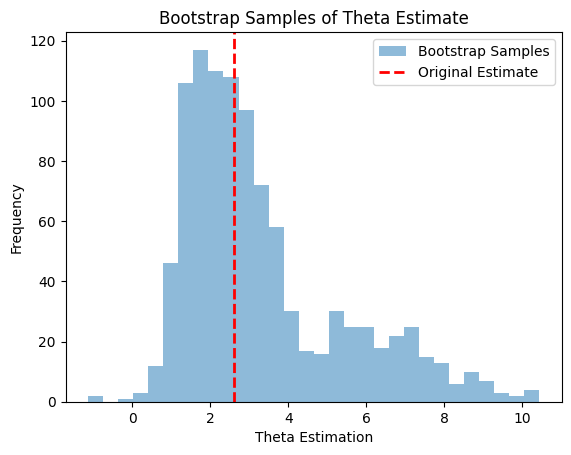

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Z = np.array([ 1251, 856, 952, 752, 635, 745, 950, 10238 ])
Y = np.array([ 3899, 4568, -5425, 6765,7856, 6856, 9592, 8423 ])

B = 1000
N = len(Z)  # size of your arrays Z and Y

theta_est = np.mean(Y) / np.mean(Z)

bootstrap_samples = []

indices = np.arange(N)  # generate an array of indices from 0 to N-1

for _ in range(B):
    bootstrap_indices = np.random.choice(indices, size=N)  # bootstrap sampling of indices
    sample_Z = Z[bootstrap_indices]  # get corresponding values from Z
    sample_Y = Y[bootstrap_indices]  # get corresponding values from Y
    bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
    bootstrap_samples.append(bootstrap_theta_est)

bootstrap_samples = np.array(bootstrap_samples)

# calculate the standard error
se = np.std(bootstrap_samples, ddof=1)
print("Standard Error:", se)

# calculate the bias
bias = np.mean(bootstrap_samples) - theta_est
print("Bias:", bias)

# calculate the coefficient of variation
cv = bias / se
print("Coefficient of Variation:", cv)

# print original theta_est
print("Original Theta Estimate:", theta_est)

# plot histogram
plt.hist(bootstrap_samples, bins=30, alpha=0.5, label='Bootstrap Samples')
plt.axvline(theta_est, color='r', linestyle='dashed', linewidth=2, label='Original Estimate')
plt.xlabel('Theta Estimation')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Bootstrap Samples of Theta Estimate')
plt.show()


Standard Error: 2.111920496622044
Bias: 0.7976481723176634
Coefficient of Variation: 0.37768854158737447
Original Theta Estimate: 2.596861835276879


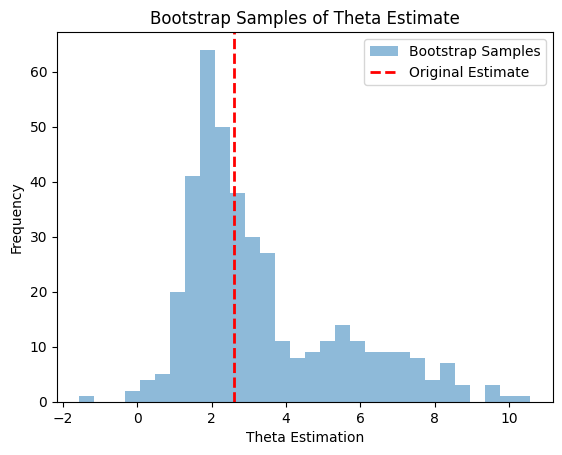

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Z = np.array([ 1251, 856, 952, 752, 635, 745, 950, 10238 ])
Y = np.array([ 3899, 4568, -5425, 6765,7856, 6856, 9592, 8423 ])

B = 400
N = len(Z)  # size of your arrays Z and Y

theta_est = np.mean(Y) / np.mean(Z)

bootstrap_samples = []
resampling_vectors = []

indices = np.arange(N)  # generate an array of indices from 0 to N-1

for _ in range(B):
    bootstrap_indices = np.random.choice(indices, size=N)  # bootstrap sampling of indices
    sample_Z = Z[bootstrap_indices]  # get corresponding values from Z
    sample_Y = Y[bootstrap_indices]  # get corresponding values from Y

    bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
    bootstrap_samples.append(bootstrap_theta_est)

    # Compute the resampling vector
    resampling_vector = [np.count_nonzero(bootstrap_indices == i) for i in indices]
    resampling_vector = np.array(resampling_vector) / N
    resampling_vectors.append(resampling_vector)

bootstrap_samples = np.array(bootstrap_samples)
resampling_vectors = np.array(resampling_vectors)  # convert list of arrays into 2D array

# Calculate the mean resampling vector
mean_resample_vec = np.mean(resampling_vectors, axis=0)

# calculate the standard error
se = np.std(bootstrap_samples, ddof=1)
print("Standard Error:", se)

# calculate the bias using mean of resampling vector
theta_star = np.average(Y, weights=mean_resample_vec) / np.average(Z, weights=mean_resample_vec)
bias = np.mean(bootstrap_samples) - theta_star
print("Bias:", bias)

# calculate the coefficient of variation
cv = bias / se
print("Coefficient of Variation:", cv)

# print original theta_est
print("Original Theta Estimate:", theta_est)

# plot histogram
plt.hist(bootstrap_samples, bins=30, alpha=0.5, label='Bootstrap Samples')
plt.axvline(theta_est, color='r', linestyle='dashed', linewidth=2, label='Original Estimate')
plt.xlabel('Theta Estimation')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Bootstrap Samples of Theta Estimate')
plt.show()


For the largest number of bootstrap samples (6400):
Simple bias estimate: 0.00027759076035002717
Resample bias estimate: -0.00017424017441788897


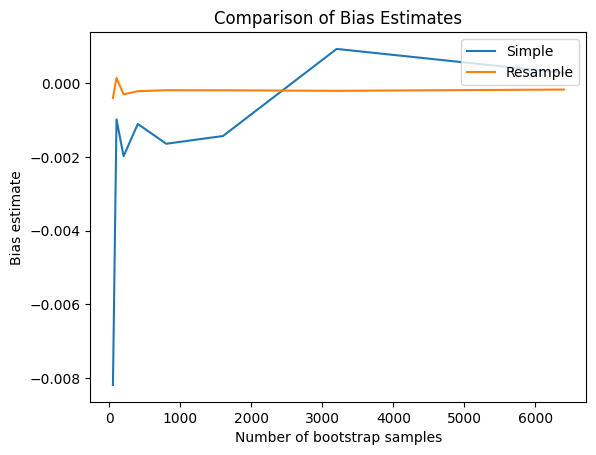

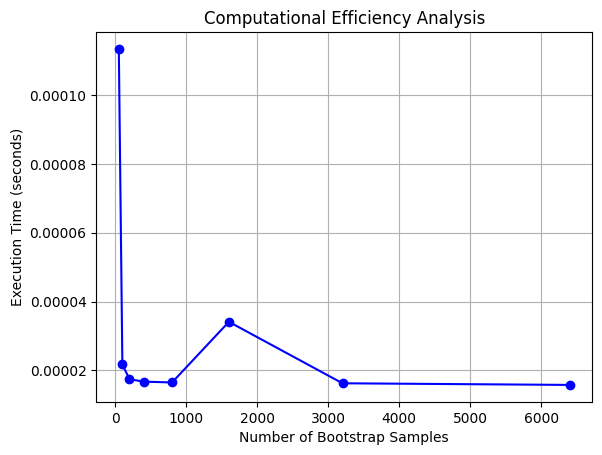

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Initial data
Z = np.array([ 6523, 7477, 7546, 8215, 8654, 8956, 8742, 7887 ])
Y = np.array([ 817, -754, 937, -823, 785, 1200, 1145, 693 ])
N = len(Z)
theta_est = np.mean(Y) / np.mean(Z)
indices = np.arange(N)

# List of numbers of bootstrap samples to try
B_values = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# Lists to store bias estimates
bias_simple_list = []
bias_resample_list = []

for B in B_values:
    bootstrap_samples = []
    resampling_vectors = []

    for _ in range(B):
        bootstrap_indices = np.random.choice(indices, size=N)
        sample_Z = Z[bootstrap_indices]
        sample_Y = Y[bootstrap_indices]

        bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
        bootstrap_samples.append(bootstrap_theta_est)

        # Compute the resampling vector
        resampling_vector = [np.count_nonzero(bootstrap_indices == i) for i in indices]
        resampling_vector = np.array(resampling_vector) / N
        resampling_vectors.append(resampling_vector)

    bootstrap_samples = np.array(bootstrap_samples)
    resampling_vectors = np.array(resampling_vectors)

    # Calculate the mean resampling vector
    mean_resample_vec = np.mean(resampling_vectors, axis=0)

    # Compute simple bias estimate and store it
    bias_simple = np.mean(bootstrap_samples) - theta_est
    bias_simple_list.append(bias_simple)

    # Compute bias estimate using mean of resampling vector and store it
    theta_star = np.average(Y, weights=mean_resample_vec) / np.average(Z, weights=mean_resample_vec)
    bias_resample = np.mean(bootstrap_samples) - theta_star
    bias_resample_list.append(bias_resample)

# Print the bias estimates from the largest number of bootstrap samples
print(f'For the largest number of bootstrap samples ({B_values[-1]}):')
print(f'Simple bias estimate: {bias_simple_list[-1]}')
print(f'Resample bias estimate: {bias_resample_list[-1]}')

# Plot the bias estimates
plt.plot(B_values, bias_simple_list, label='Simple')
plt.plot(B_values, bias_resample_list, label='Resample')
plt.xlabel('Number of bootstrap samples')
plt.ylabel('Bias estimate')
plt.legend(loc='upper right')
plt.title('Comparison of Bias Estimates')
plt.show()

# import time

# # Record start time
# start_time = time.time()

# # ... [Code to be profiled] ...

# # Record end time
# end_time = time.time()

# # Calculate and print elapsed time
# elapsed_time = end_time - start_time
# print(f"Elapsed time: {elapsed_time} seconds")

import numpy as np
import matplotlib.pyplot as plt
import time

# Function to perform the computation (replace this with your actual code)
def perform_computation(B):
    # Your computation code here (e.g., bootstrap sampling and bias estimation)
    Z = np.array([ 6523, 7477, 7546, 8215, 8654, 8956, 8742, 7887 ])
    Y = np.array([ 817, -754, 937, -823, 785, 1200, 1145, 693 ])
    N = len(Z)
    theta_est = np.mean(Y) / np.mean(Z)
    indices = np.arange(N)
    bias_simple_list = []
bias_resample_list = []

for B in B_values:
    bootstrap_samples = []
    resampling_vectors = []

    for _ in range(B):
        bootstrap_indices = np.random.choice(indices, size=N)
        sample_Z = Z[bootstrap_indices]
        sample_Y = Y[bootstrap_indices]

        bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
        bootstrap_samples.append(bootstrap_theta_est)

        # Compute the resampling vector
        resampling_vector = [np.count_nonzero(bootstrap_indices == i) for i in indices]
        resampling_vector = np.array(resampling_vector) / N
        resampling_vectors.append(resampling_vector)

    bootstrap_samples = np.array(bootstrap_samples)
    resampling_vectors = np.array(resampling_vectors)

    # Calculate the mean resampling vector
    mean_resample_vec = np.mean(resampling_vectors, axis=0)

    # Compute simple bias estimate and store it
    bias_simple = np.mean(bootstrap_samples) - theta_est
    bias_simple_list.append(bias_simple)

    # Compute bias estimate using mean of resampling vector and store it
    theta_star = np.average(Y, weights=mean_resample_vec) / np.average(Z, weights=mean_resample_vec)
    bias_resample = np.mean(bootstrap_samples) - theta_star
    bias_resample_list.append(bias_resample)

    # Replace the sleep with your actual computation
    time.sleep(0.1)

# Varying number of bootstrap samples
B_values = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# Lists to store execution times
execution_times = []

# Perform the computation for each value of B
for B in B_values:
    start_time = time.time()
    perform_computation(B)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plotting the graph
plt.plot(B_values, execution_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Bootstrap Samples')
plt.ylabel('Execution Time (seconds)')
plt.title('Computational Efficiency Analysis')
plt.grid(True)
plt.show()




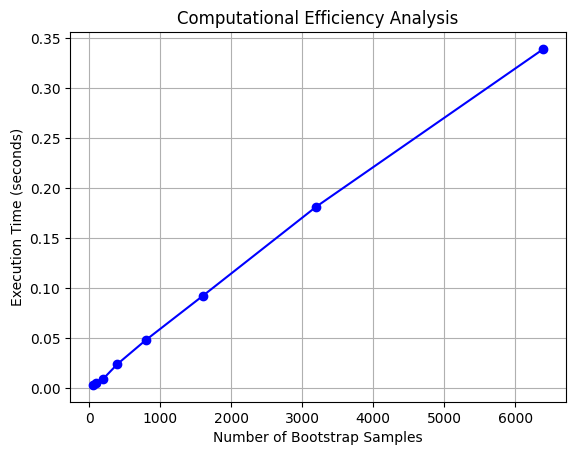

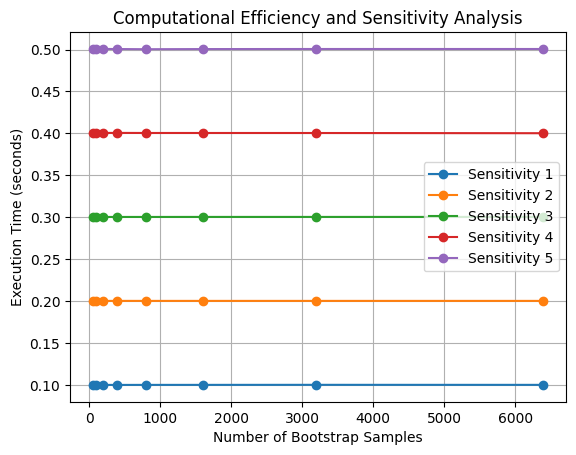

NameError: name 'Z' is not defined

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Your actual bootstrap and bias estimation code goes here
def perform_bootstrap_bias_estimation(B):
    Z = np.array([8406, 2342, 8187, 8459, 4795, 3516, 4796, 10238])
    Y = np.array([1251, 856, 952, 752, 635, 745, 950, 701])
    N = len(Z)
    theta_est = np.mean(Y) / np.mean(Z)
    indices = np.arange(N)

    bootstrap_samples = []

    for _ in range(B):
        bootstrap_indices = np.random.choice(indices, size=N)
        sample_Z = Z[bootstrap_indices]
        sample_Y = Y[bootstrap_indices]

        bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
        bootstrap_samples.append(bootstrap_theta_est)

    # Replace this with the actual bias calculation
    bias = np.mean(bootstrap_samples) - theta_est

    return bias

# Varying number of bootstrap samples
B_values = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# Lists to store execution times
execution_times = []

# Perform the computation for each value of B
for B in B_values:
    start_time = time.time()
    perform_bootstrap_bias_estimation(B)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plotting the graph
plt.plot(B_values, execution_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Bootstrap Samples')
plt.ylabel('Execution Time (seconds)')
plt.title('Computational Efficiency Analysis')
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import time

# Function to perform the computation with sensitivity parameters
def perform_computation(B, sensitivity_param):
    # Your computation code here, considering sensitivity_param
    # Replace the sleep with your actual computation
    time.sleep(0.1 * sensitivity_param)

# Sensitivity parameters (e.g., different sample sizes, distribution characteristics, etc.)
sensitivity_params = [1, 2, 3, 4, 5]

# Varying number of bootstrap samples
B_values = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# Dictionary to store execution times for each sensitivity parameter
execution_times_dict = {}

# Perform the computation for each sensitivity parameter and each value of B
for sensitivity_param in sensitivity_params:
    execution_times = []
    for B in B_values:
        start_time = time.time()
        perform_computation(B, sensitivity_param)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)
    execution_times_dict[sensitivity_param] = execution_times

# Plotting the graph for each sensitivity parameter
for sensitivity_param, execution_times in execution_times_dict.items():
    plt.plot(B_values, execution_times, marker='o', linestyle='-', label=f'Sensitivity {sensitivity_param}')

plt.xlabel('Number of Bootstrap Samples')
plt.ylabel('Execution Time (seconds)')
plt.title('Computational Efficiency and Sensitivity Analysis')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Function to perform the computation with sensitivity parameters
def perform_computation(B, sensitivity_param, Z, Y):
    N = len(Z)
    theta_est = np.mean(Y) / np.mean(Z)
    indices = np.arange(N)

    bootstrap_samples = []
    resampling_vectors = []

    for _ in range(B):
        bootstrap_indices = np.random.choice(indices, size=N)
        sample_Z = Z[bootstrap_indices]
        sample_Y = Y[bootstrap_indices]

        bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
        bootstrap_samples.append(bootstrap_theta_est)

        # Compute the resampling vector
        resampling_vector = [np.count_nonzero(bootstrap_indices == i) for i in indices]
        resampling_vector = np.array(resampling_vector) / N
        resampling_vectors.append(resampling_vector)

    bootstrap_samples = np.array(bootstrap_samples)
    resampling_vectors = np.array(resampling_vectors)

    # Calculate the mean resampling vector
    mean_resample_vec = np.mean(resampling_vectors, axis=0)

    # Compute bias estimate using mean of resampling vector
    theta_star = np.average(Y, weights=mean_resample_vec) / np.average(Z, weights=mean_resample_vec)
    bias_resample = np.mean(bootstrap_samples) - theta_star

    return bias_resample

# Sensitivity parameters (e.g., different ratios of B to N)
sensitivity_params = [0.1, 0.2, 0.5, 1, 2, 5, 10]

# List of numbers of bootstrap samples to try
B_values = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# Dictionary to store bias estimates for each sensitivity parameter
bias_resample_dict = {}

# Perform the computation for each sensitivity parameter and each value of B
for sensitivity_param in sensitivity_params:
    bias_resample_list = []
    for B in B_values:
        bias_resample = perform_computation(int(B * sensitivity_param), sensitivity_param,Z, Y)
        bias_resample_list.append(bias_resample)
    bias_resample_dict[sensitivity_param] = bias_resample_list

# Plotting the graph for each sensitivity parameter
for sensitivity_param, bias_resample_list in bias_resample_dict.items():
    plt.plot(B_values, bias_resample_list, marker='o', linestyle='-', label=f'Sensitivity {sensitivity_param}')

plt.xlabel('Number of Bootstrap Samples')
plt.ylabel('Bias Estimate (Resample)')
plt.legend()
plt.title('Sensitivity Analysis of Bias Estimation')
plt.grid(True)
plt.show()




NameError: name 'Z' is not defined

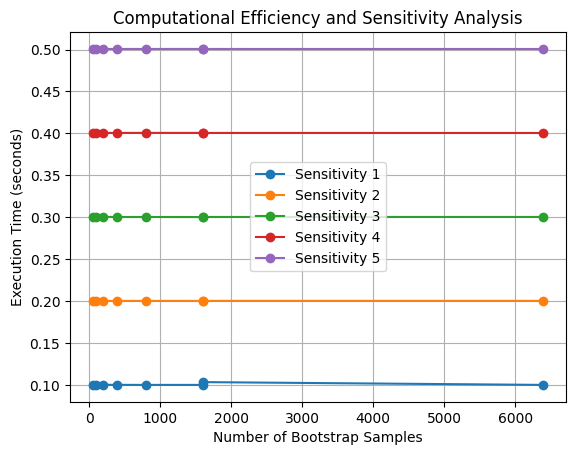

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to perform the computation with sensitivity parameters
def perform_computation(B, sensitivity_param):
    # Your computation code here, considering sensitivity_param
    # Replace the sleep with your actual computation
    time.sleep(0.1 * sensitivity_param)

# Sensitivity parameters (e.g., different sample sizes, distribution characteristics, etc.)
sensitivity_params = [1, 2, 3, 4, 5]

# Varying number of bootstrap samples
B_values = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# Dictionary to store execution times for each sensitivity parameter
execution_times_dict = {}

# Perform the computation for each sensitivity parameter and each value of B
for sensitivity_param in sensitivity_params:
    execution_times = []
    for B in B_values:
        start_time = time.time()
        perform_computation(B, sensitivity_param)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)
    execution_times_dict[sensitivity_param] = execution_times

# Plotting the graph for each sensitivity parameter
for sensitivity_param, execution_times in execution_times_dict.items():
    plt.plot(B_values, execution_times, marker='o', linestyle='-', label=f'Sensitivity {sensitivity_param}')

plt.xlabel('Number of Bootstrap Samples')
plt.ylabel('Execution Time (seconds)')
plt.title('Computational Efficiency and Sensitivity Analysis')
plt.legend()
plt.grid(True)
plt.show()
